<a href="https://colab.research.google.com/github/ElizabethQueen25/my-python-path/blob/main/Avance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Importación de datos</h2>

<p>
Para evaluar el rendimiento de los precios del petróleo se utilizarán datos
mensuales obtenidos desde <strong>Yahoo Finance</strong>. El petróleo constituye
una variable clave en el análisis económico y financiero, debido a su impacto
directo sobre la inflación, los términos de intercambio y los mercados de
capitales, así como por su elevada volatilidad y sensibilidad a shocks externos.
</p>

<p>
El uso de datos mensuales permite capturar la dinámica de mediano plazo del
precio del petróleo, reduciendo el ruido de alta frecuencia presente en series
diarias y facilitando la comparación entre distintos modelos de predicción.
Esta frecuencia resulta particularmente adecuada para el análisis econométrico
y la evaluación del desempeño predictivo fuera de muestra.
</p>

<p>
Los datos serán extraídos directamente desde Yahoo Finance mediante librerías
especializadas en Python, lo que garantiza reproducibilidad, acceso a series
actualizadas y una integración sencilla con los métodos de estimación y
predicción considerados en este trabajo.
</p>


### Instalación de librerías para la importación de datos

Para la descarga y manejo de datos financieros desde Yahoo Finance se utilizará
la librería **yfinance**, la cual permite acceder de forma sencilla a series
históricas de precios.

La instalación puede realizarse mediante `pip`:

```bash
pip install yfinance


In [ ]:
#Importamos las siguientes librerias y descargamos
#los datos de precios del petróleo Brent desde Yahoo Finance.
import yfinance as yf
import pandas as pd

# Definir tickers de petróleo
tickers = {
    "Brent": "BZ=F"   # Brent
}

# Descargar datos diarios
data = yf.download(
    list(tickers.values()),
    start="2000-01-01",
    auto_adjust=True
)

# Quedarse con el precio de cierre
prices = data["Close"]

# Cambiar nombres de columnas
prices.columns = tickers.keys()

# Convertir a frecuencia mensual (último precio del mes)
prices_monthly = prices.resample("ME").last()

# Mostrar primeras observaciones
prices_monthly.head()


[*********************100%***********************]  1 of 1 completed


,Brent
Date,
2007-07-31,77.050003
2007-08-31,72.690002
2007-09-30,79.169998
2007-10-31,90.629997
2007-11-30,88.260002


from matplotlib import pyplot as plt
_df_0['Brent'].plot(kind='hist', bins=20, title='Brent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Brent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Brent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Brent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Brent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Brent'].plot(kind='line', figsize=(8, 4), title='Brent')
plt.gca().spines[['top', 'right']].set_visible(False)

```bash
pip install matplotlib

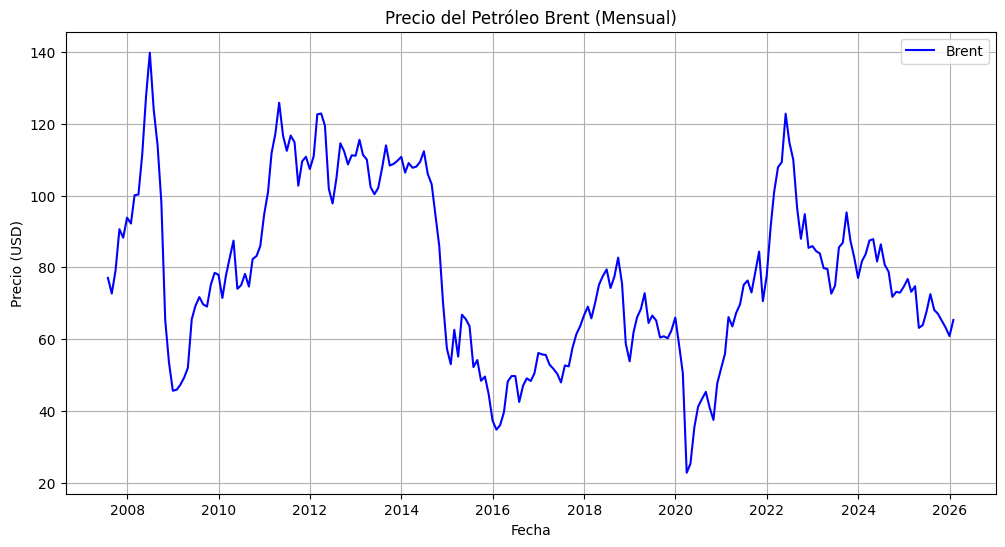

In [ ]:
#Graficamos los precios del petróleo Brent a lo largo del tiempo.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(prices_monthly.index, prices_monthly["Brent"],
         label="Brent", color='blue')
plt.title("Precio del Petróleo Brent (Mensual)")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid()

## Modelo: Filtro de Kalman

El filtro de Kalman es una herramienta fundamental para el análisis y la
predicción de series de tiempo cuando el proceso subyacente puede
representarse mediante un sistema dinámico con estados no observables.
En econometría, su uso resulta especialmente relevante en contextos donde las
variables económicas presentan ruido, cambios estructurales graduales
o componentes latentes que no pueden observarse directamente.

El modelo se formula en un marco de espacio de estados, donde la dinámica
del sistema se describe mediante una ecuación de transición del estado y
una ecuación de medición para la variable observada. De manera general, el
sistema puede expresarse como:

$$
\begin{aligned}
x_t &= F x_{t-1} + u_t \\
y_t &= H x_t + v_t
\end{aligned}
$$

donde $x_t$ representa el estado no observado del sistema,
$y_t$ la variable observada, y los términos de error $u_t$ y
$v_t$ capturan el ruido del proceso y el ruido de medición,
respectivamente. Bajo el supuesto de normalidad y varianzas conocidas,
el filtro de Kalman proporciona el estimador lineal insesgado de mínima
varianza para el estado.

Desde una perspectiva predictiva, el filtro opera en dos etapas recurrentes:

1. Fase de predicción, en la que se proyecta el estado del sistema utilizando
   la información pasada.
2. Fase de actualización, en la que la predicción se corrige incorporando
   la nueva observación disponible.

Esta estructura recursiva permite que el modelo se adapte dinámicamente a
la evolución de la serie, lo que resulta ventajoso frente a modelos puramente
autorregresivos cuando existen cambios en la tendencia o en la volatilidad.

En términos de predicción económica, el filtro de Kalman destaca por su
capacidad para suavizar series ruidosas y generar pronósticos consistentes
incluso en entornos con información incompleta. No obstante, su desempeño
depende críticamente de la correcta especificación de las matrices de
varianza del sistema, lo que introduce un componente empírico relevante
en su calibración.

En este trabajo, el filtro de Kalman será implementado en Python con el
objetivo de evaluar su capacidad predictiva y compararla con otros
enfoques clásicos y modernos. El análisis se centrará en la calidad de
los pronósticos fuera de muestra, utilizando criterios estándar de evaluación,
lo que permitirá valorar su desempeño relativo dentro del conjunto de modelos
considerados.


### Instalación de la librería recomendada

Para la implementación del filtro de Kalman en Python se utilizará la librería
**filterpy**, ampliamente empleada en aplicaciones de filtrado, estimación y
modelos en espacio de estados.

La instalación puede realizarse directamente desde `pip`:

```bash
pip install filterpy


In [ ]:
import sys
# Instalar filterpy en el entorno del kernel que ejecuta este notebook
get_ipython().system(f'{sys.executable} -m pip install filterpy -q')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Serie mensual de precios Brent
df_brent = prices_monthly.copy()
df_brent = df_brent.dropna()

# Parámetros temporales
dt = 1

# Crear filtro de Kalman
kf_brent = KalmanFilter(dim_x=2, dim_z=1)

# Estado inicial: [precio, cambio de precio]
precio_inicial = df_brent['Brent'].iloc[0]
cambio_inicial = df_brent['Brent'].diff().fillna(0).iloc[0]

kf_brent.x = np.array([[precio_inicial],
                       [cambio_inicial]])

# Matriz de transición (precio–velocidad)
kf_brent.F = np.array([[1, dt],
                       [0, 1]])

# Matriz de observación (solo precio observado)
kf_brent.H = np.array([[1, 0]])

# Ruido de medición
deltax = 0.05
kf_brent.R = np.array([[deltax**2]])

# Ruido del proceso
Q_var = 0.003
kf_brent.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_var**2)

# Covarianza inicial
kf_brent.P = np.diag([0.15**2, 0.20**2])

# Filtrado
precio_estimado = []
cambio_estimado = []

for z in df_brent['Brent']:
    kf_brent.predict()
    kf_brent.update(z)
    precio_estimado.append(kf_brent.x[0, 0])
    cambio_estimado.append(kf_brent.x[1, 0])

# Gráfico: precio observado vs estimado
plt.figure(figsize=(10, 5))
plt.plot(df_brent.index, df_brent['Brent'],
         label='Precio Brent Observado', linewidth=1)
plt.plot(df_brent.index, precio_estimado,
         label='Precio Brent Estimado (Kalman)', linewidth=1)
plt.title('Filtro de Kalman aplicado al Precio Spot del Petróleo Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico: cambio estimado del precio
plt.figure(figsize=(10, 5))
plt.plot(df_brent.index, cambio_estimado,
         label='Cambio Estimado del Precio Brent', linewidth=1)
plt.title('Estimación del Cambio del Precio del Petróleo Brent')
plt.xlabel('Fecha')
plt.ylabel('Cambio de Precio (USD/mes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
future_steps = 12
N_SIM = 100

last_date = df_brent.index[-1]   # enero 2026
dates_future = pd.date_range(
    start=last_date + pd.DateOffset(months=1),  # febrero 2026
    periods=future_steps,
    freq='ME'
)

futures_matrix = np.zeros((future_steps, N_SIM))

X_base = kf_brent.x.copy()
Q_proc = kf_brent.Q.copy()

for s in range(N_SIM):
    X_temp = X_base.copy()
    for t in range(future_steps):
        noise = np.random.multivariate_normal([0, 0], Q_proc).reshape(-1, 1)
        X_temp = kf_brent.F @ X_temp + noise
        futures_matrix[t, s] = X_temp[0, 0]

p2_5 = np.percentile(futures_matrix, 2.5, axis=1)
p50 = np.percentile(futures_matrix, 50, axis=1)
p97_5 = np.percentile(futures_matrix, 97.5, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(df_brent.index, precio_estimado, label='Estimación Kalman (Brent)', linewidth=1)
plt.plot(dates_future, p50, '--', label='Proyección mediana', linewidth=1)
plt.fill_between(dates_future, p2_5, p97_5, alpha=0.3, label='Banda 2.5% – 97.5%')

plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Proyección del Precio Spot del ' \
'Petróleo Brent con Filtro de Kalman')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

feb_2026_index = None
for i, d in enumerate(dates_future):
    if d.year == 2026 and d.month == 2:
        feb_2026_index = i
        break

feb_2026_projection = (
    p50[feb_2026_index] if feb_2026_index is not None else np.nan
)

print(f"Proyección del precio del petróleo Brent para febrero de 2026: ${feb_2026_projection:.2f} USD")

Vamos a almacenar el dato de la proyección

In [ ]:
# Almacenar proyección mensual del Filtro de Kalman (mediana)

df_kalman_forecast = pd.DataFrame({
    'Fecha': dates_future,
    'Precio_Kalman_P50': p50,
    'Precio_Kalman_P2_5': p2_5,
    'Precio_Kalman_P97_5': p97_5
})

df_kalman_forecast.set_index('Fecha', inplace=True)
df_kalman_forecast.head()

kalman_feb_2026 = df_kalman_forecast.loc['2026-02-28', 'Precio_Kalman_P50']
print(f"Proyección Kalman Brent – Febrero 2026: {kalman_feb_2026:.2f} USD")